In [55]:
import numpy as np
import pandas as pd

%matplotlib inline

LSTM model using uber SEC financial data plusing closing prices

In [56]:
uber_sec = pd.read_csv('/Users/krist/OneDrive/Desktop/P2G2-ProjectGit/Notebooks/models/resources/UBER_copy.csv', index_col = 0)
uber_sec.head()

,Revenues,CostOfGoodsAndServiceExcludingDepreciationDepletionAndAmortization,OperationsAndSupportExpense,SellingAndMarketingExpense,ResearchAndDevelopmentExpense,GeneralAndAdministrativeExpense,DepreciationDepletionAndAmortization,CostsAndExpenses,OperatingIncomeLoss,InterestExpense,...,Unnamed: 16,NetIncomeLoss,EarningsPerShareBasic,EarningsPerShareDiluted,WeightedAverageNumberOfSharesOutstandingBasic,WeightedAverageNumberOfDilutedSharesOutstanding,NetIncomeLossAttributableToRedeemableNoncontrollingInterest,ticker,close,volume
date,,,,,,,,,,,,,,,,,,,,,
2019-05-10,3.099000e+09,1.681000e+09,434000000.0,1.040000e+09,409000000.0,423000000.0,146000000.0,4.133000e+09,-1.034000e+09,217000000.0,...,-4000000.0,-1.012000e+09,-2.23,-2.26,453543000.0,453619000.0,0.0,UBER,41.57,189836990.0
2019-05-13,3.099000e+09,1.681000e+09,434000000.0,1.040000e+09,409000000.0,423000000.0,146000000.0,4.133000e+09,-1.034000e+09,217000000.0,...,-4000000.0,-1.012000e+09,-2.23,-2.26,453543000.0,453619000.0,0.0,UBER,37.10,79478203.0
2019-05-14,3.099000e+09,1.681000e+09,434000000.0,1.040000e+09,409000000.0,423000000.0,146000000.0,4.133000e+09,-1.034000e+09,217000000.0,...,-4000000.0,-1.012000e+09,-2.23,-2.26,453543000.0,453619000.0,0.0,UBER,39.96,46661187.0
2019-05-15,3.099000e+09,1.681000e+09,434000000.0,1.040000e+09,409000000.0,423000000.0,146000000.0,4.133000e+09,-1.034000e+09,217000000.0,...,-4000000.0,-1.012000e+09,-2.23,-2.26,453543000.0,453619000.0,0.0,UBER,41.29,36086872.0
2019-05-16,3.099000e+09,1.681000e+09,434000000.0,1.040000e+09,409000000.0,423000000.0,146000000.0,4.133000e+09,-1.034000e+09,217000000.0,...,-4000000.0,-1.012000e+09,-2.23,-2.26,453543000.0,453619000.0,0.0,UBER,43.00,38115524.0


In [57]:
def window_data(df, window, feature_col_number, target_col_number):
    X = []
    y = []
    for i in range(len(df) - window - 1):
        features = df.iloc[i:(i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [58]:
#Setting the feature col to revenue and target col to closing prices
X, y = window_data(uber_sec, window=30, feature_col_number=0, target_col_number=23)

In [59]:
# Use 70% of the data for training and the remaineder for testing
split = int(0.7 * len(X))
X_train = X[: split]
X_test = X[split:]
y_train = y[: split]
y_test = y[split:]

In [60]:
from sklearn.preprocessing import MinMaxScaler
# Use the MinMaxScaler to scale data between 0 and 1.
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the MinMaxScaler object with the features data X
scaler.fit(X_train)

# Scale the features training and testing sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Fit the MinMaxScaler object with the target data Y
scaler.fit(y_train)

# Scale the target training and testing sets
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [61]:
# Reshape the features for the model

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [63]:

model = Sequential()

number_units = 5
dropout_fraction = 0.2

#Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))

#Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))

#Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))

#Output Layer
model.add(Dense(1))

In [64]:
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [65]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 30, 5)             140       
                                                                 
 dropout_6 (Dropout)         (None, 30, 5)             0         
                                                                 
 lstm_7 (LSTM)               (None, 30, 5)             220       
                                                                 
 dropout_7 (Dropout)         (None, 30, 5)             0         
                                                                 
 lstm_8 (LSTM)               (None, 5)                 220       
                                                                 
 dropout_8 (Dropout)         (None, 5)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                

In [66]:
model.fit(X_train, y_train, epochs=15, shuffle=False, batch_size=1, verbose=1)

Epoch 1/15
519/519 [==============================] - 11s 14ms/step - loss: 0.0416
Epoch 2/15
519/519 [==============================] - 7s 13ms/step - loss: 0.0204
Epoch 3/15
519/519 [==============================] - 8s 16ms/step - loss: 0.0195
Epoch 4/15
519/519 [==============================] - 7s 13ms/step - loss: 0.0197
Epoch 5/15
519/519 [==============================] - 7s 14ms/step - loss: 0.0197
Epoch 6/15
519/519 [==============================] - 7s 13ms/step - loss: 0.0212
Epoch 7/15
519/519 [==============================] - 8s 15ms/step - loss: 0.0227
Epoch 8/15
519/519 [==============================] - 7s 13ms/step - loss: 0.0236
Epoch 9/15
519/519 [==============================] - 7s 14ms/step - loss: 0.0230
Epoch 10/15
519/519 [==============================] - 7s 14ms/step - loss: 0.0203
Epoch 11/15
519/519 [==============================] - 8s 15ms/step - loss: 0.0277
Epoch 12/15
519/519 [==============================] - 14s 28ms/step - loss: 0.0300
Epoch 13/15

In [67]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 1s 6ms/step - loss: 0.0452


0.045223698019981384

In [68]:
predict = model.predict(X_test)

7/7 [==============================] - 1s 5ms/step


In [69]:
predicted_prices = scaler.inverse_transform(predict)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [70]:
# Create a DataFrame of Real and Predicted values
stocks_rev = pd.DataFrame({
    "actual": real_prices.ravel(),
    "predicted": predicted_prices.ravel()
}, index = uber_sec.index[-len(real_prices): ]) 
stocks_rev.head()

,actual,predicted
date,,
2021-07-15,47.15,47.544701
2021-07-16,46.42,47.364044
2021-07-19,46.19,47.225029
2021-07-20,45.56,47.118908
2021-07-21,46.32,47.038052


<AxesSubplot:xlabel='date'>

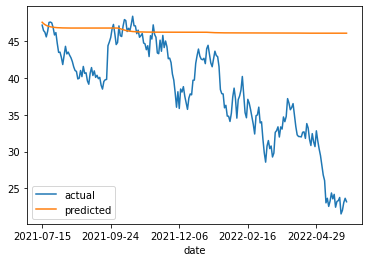

In [71]:
stocks_rev.plot()

In [72]:
stocks_dif = stocks_rev
stocks_dif['difference'] = stocks_dif.actual - stocks_dif.predicted
stocks_dif['error'] = (stocks_dif.difference/stocks_dif.actual) * 100
stocks_dif.head()

,actual,predicted,difference,error
date,,,,
2021-07-15,47.15,47.544701,-0.394701,-0.837117
2021-07-16,46.42,47.364044,-0.944044,-2.033701
2021-07-19,46.19,47.225029,-1.035029,-2.240808
2021-07-20,45.56,47.118908,-1.558908,-3.421659
2021-07-21,46.32,47.038052,-0.718052,-1.550198
